### What can you find in this notebook ?

The purpose of the Notebook is to offer a **quick** overview on how to use [`Matplotlib`](https://matplotlib.org/) / [`Seaborn`](https://seaborn.pydata.org/).

During the tutorial, we will provide you with different visualizations, and we will ask you to spot and implement any improvements in them. This is not meant to be an exhaustive documentation of the libraries, their features or their API, but can be useful to get started with the Python visualization ecosystem.

---

Credits: Jérémie Rappaz 

*Updated by: [Pablo Cañas](https://github.com/pcanas)*

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

If you have an error about missing modules, try this:
```
conda install numpy
conda install matplotlib
conda install seaborn
```

## Hello world

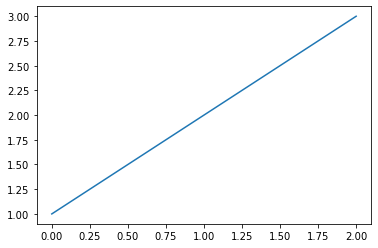

In [2]:
x = [1,2,3]
plt.plot(x)

#### Do you spot any problem ?

**Hint**

The plot does not contain any labels in the x or y axis. This is essential in any plot, to make it clear what you are representing.

Try adding x-axis and y-axis labels. Check for example: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html

**Solution**

In [ ]:
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.plot(x)

# Line plot

Text(0, 0.5, 'amplitude [V]')

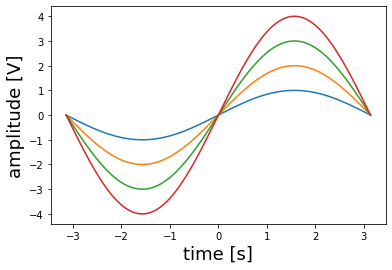

In [3]:
for i in range(1,5):
    x = np.linspace(-np.pi, np.pi, 201)
    plt.plot(x, np.sin(x)*i)
    
plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)

#### Do you spot any problem ?

**Hint**

The plot does not contain a legend representing the lines. This is also harms the interpretability of the visualization.

Try adding a legend to the plot. Check: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

**Solution**

In [ ]:
for i in range(1,5):
    x = np.linspace(-np.pi, np.pi, 201)
    plt.plot(x, np.sin(x)*i, label=str(i))
    
plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)
plt.legend(loc=4)

## Error bars

In [4]:
# Data
var1 = np.random.normal(10,1,10000)
var2 = np.random.normal(10,10,10000)
var3 = np.random.normal(10,100,10000)

# Calculate the average
var1_mean = np.mean(var1)
var2_mean = np.mean(var2)
var3_mean = np.mean(var3)

# Calculate the standard deviation
var1_std = np.std(var1)
var2_std = np.std(var2)
var3_std = np.std(var3)

# Define labels, positions, bar heights and error bar heights
labels = ['var1', 'var2', 'var3']
x_pos  = np.arange(len(labels))
CTEs   = [var1_mean, var2_mean, var3_mean]
error  = [var1_std*2, var2_std*2, var3_std*2]

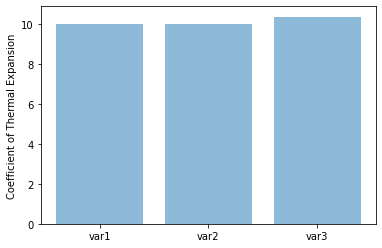

In [5]:
plt.bar(x_pos, CTEs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, 
       tick_label=labels)

plt.ylabel('Coefficient of Thermal Expansion')
_ = plt.xticks(x_pos)

#### Do you spot any problem ?

**Hint**

The error bars are not there! Let's plot them.

Check the arguments of https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

**Solution**

In [ ]:
errs = [1.96*var1_std, 1.96*var2_std, 1.96*var3_std]

plt.bar(x_pos, CTEs,
       yerr = errs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, 
       tick_label=labels)

plt.title("Random quantity (95% CI)")
plt.ylabel('Coefficient of Thermal Expansion')
_ = plt.xticks(x_pos)

## Markers / legend

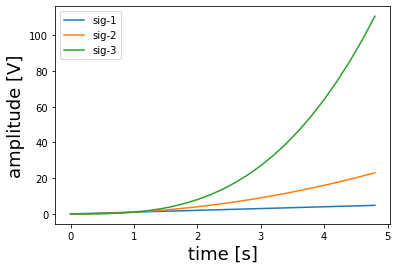

In [6]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, label="sig-1")
plt.plot(t, t**2, label="sig-2")
plt.plot(t, t**3, label="sig-3")

plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)
plt.legend()

#### Do you spot any problem ?

**Hint**

The markers representing each of the lines (red dashes, blue squares and green triangles) are not visible. These will enhance the quality of the representation.

Let's visualize such markers in the plot. Check the arguments of https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

**Solution**

In [ ]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, label="sig-1", marker='o')
plt.plot(t, t**2, label="sig-2", marker='*')
plt.plot(t, t**3, label="sig-3", marker='^')

plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)
plt.legend()

## Non-linear scale

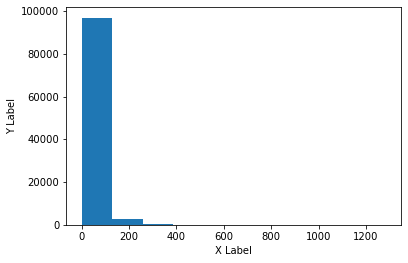

In [7]:
mu, sigma = 3., 1 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100000)

plt.xlabel("X Label")
plt.ylabel("Y Label")
_ = plt.hist(s)

#### Do you spot any problem ?

**Hint**

The large skewness of the data makes it very hard to visualize the histogram. A possible way to solve this could be to represent the y-axis in a logarithmic scale. Check https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html

**Solution**

In [ ]:
plt.yscale('log')
plt.xlim([0, 600])
plt.xlabel("X Label")
plt.ylabel("Y Label (log)")
_ = plt.hist(s, bins=100)

## Seaborn

Here we show an example a 3-plots figure and of the seaborn visualization library:

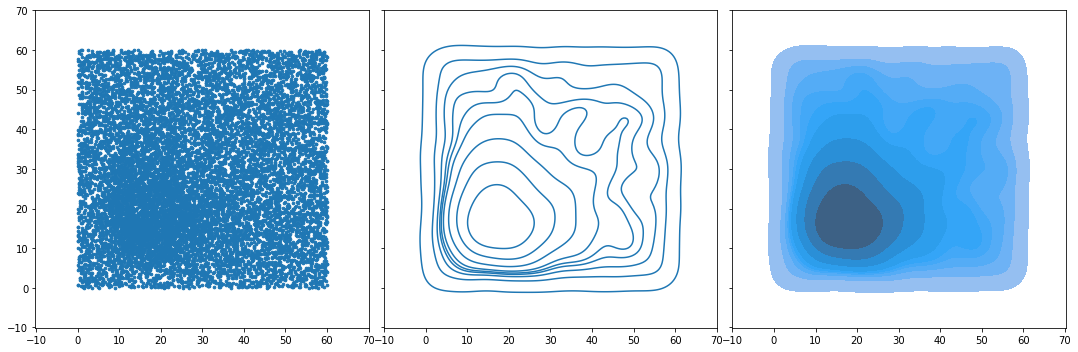

In [8]:
mu, sigma = 3., 0.5 # mean and standard deviation
x = np.random.lognormal(mu, sigma, 3000)
y = np.random.lognormal(mu, sigma, 3000)
x[x>60] = np.mean(x)
y[y>60] = np.mean(y)
x = np.append(x,np.random.uniform(0,60,10000))
y = np.append(y,np.random.uniform(0,60,10000))

f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axes[0].scatter(x, y, s=7)

sns.kdeplot (x=x, y=y, n_levels=10, ax=axes[1])
sns.kdeplot (x=x, y=y, shade=True, thresh=0.05)

f.tight_layout()

# Resources

* [Matplotlib gallery](https://matplotlib.org/gallery.html)
* [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* [D3 gallery](https://github.com/d3/d3/wiki/Gallery)